In [1]:
from utils import load_flights, load_airports_details
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import branca
from utils.data_preparation import prepare_data
import warnings

sns.set_style("whitegrid")
pd.set_option('display.max_columns', 100)

prepare_data()

warnings.simplefilter(action="ignore")
#nbformat                  5.8.0


INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


# Loading the data

In [2]:
flights = load_flights(["2007", "2008"])
flights.head()

,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Departure,CRSDeparture,Arrival,CRSArrival
0,1,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-01 12:32:00,2007-01-01 12:25:00,2007-01-01 13:41:00,2007-01-01 13:40:00
1,1,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-01 19:18:00,2007-01-01 19:05:00,2007-01-01 20:43:00,2007-01-01 20:35:00
2,1,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6.0,9.0,0,NaN,0,3.0,0.0,0.0,0.0,31.0,2007-01-01 22:06:00,2007-01-01 21:30:00,2007-01-01 23:34:00,2007-01-01 23:00:00
3,1,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3.0,8.0,0,NaN,0,23.0,0.0,0.0,0.0,3.0,2007-01-01 12:30:00,2007-01-01 12:00:00,2007-01-01 13:56:00,2007-01-01 13:30:00
4,1,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-01 08:31:00,2007-01-01 08:30:00,2007-01-01 09:57:00,2007-01-01 10:00:00


In [3]:
airports = load_airports_details()
airports.head()

,airportID,name,city,country,iata,icao,lat,lon,altitude,timezone,dst,tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9842432 entries, 0 to 9842431
Data columns (total 26 columns):
 #   Column             Dtype         
---  ------             -----         
 0   DayOfWeek          uint8         
 1   UniqueCarrier      category      
 2   FlightNum          uint16        
 3   TailNum            category      
 4   ActualElapsedTime  float32       
 5   CRSElapsedTime     float32       
 6   AirTime            float32       
 7   ArrDelay           float32       
 8   DepDelay           float32       
 9   Origin             category      
 10  Dest               category      
 11  Distance           uint16        
 12  TaxiIn             float32       
 13  TaxiOut            float32       
 14  Cancelled          uint8         
 15  CancellationCode   category      
 16  Diverted           uint8         
 17  CarrierDelay       float32       
 18  WeatherDelay       float32       
 19  NASDelay           float32       
 20  SecurityDelay      float

In [5]:
flights.describe()

,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Departure,CRSDeparture,Arrival,CRSArrival
count,9.842432e+06,9.842432e+06,9.594409e+06,9.841031e+06,9.594409e+06,9.594409e+06,9.617242e+06,9.842432e+06,9.772336e+06,9.777990e+06,9.842432e+06,9.842432e+06,8.037798e+06,8.037798e+06,8.037798e+06,8.037798e+06,8.037798e+06,9842432,9842432,9842432,9842432
mean,3.927935e+00,2.194359e+03,1.268773e+02,1.277666e+02,1.033684e+02,1.021185e+01,1.140813e+01,7.213480e+02,6.727075e+00,1.639183e+01,2.287951e-02,2.319853e-03,4.729820e+00,9.277785e-01,4.683705e+00,2.786099e-02,6.253902e+00,2007-08-30 08:32:09.607947008,2007-08-30 08:44:17.159089664,2007-08-30 09:53:44.241967872,2007-08-30 10:24:16.771251968
min,1.000000e+00,1.000000e+00,1.200000e+01,-1.240000e+03,0.000000e+00,-3.120000e+02,-3.050000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-01-01 00:00:00,2007-01-01 00:10:00,2007-01-01 00:00:00,2007-01-01 00:00:00
25%,2.000000e+00,5.930000e+02,7.600000e+01,7.800000e+01,5.500000e+01,-9.000000e+00,-4.000000e+00,3.210000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-05-01 21:12:00,2007-05-01 21:00:00,2007-05-01 22:36:45,2007-05-01 22:34:00
50%,4.000000e+00,1.518000e+03,1.090000e+02,1.100000e+02,8.500000e+01,0.000000e+00,0.000000e+00,5.740000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-08-28 07:24:00,2007-08-28 07:30:30,2007-08-28 08:55:00,2007-08-28 09:13:00
75%,6.000000e+00,3.577000e+03,1.570000e+02,1.570000e+02,1.320000e+02,1.400000e+01,1.100000e+01,9.480000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-28 08:02:00,2007-12-28 08:40:00,2007-12-28 09:24:00,2007-12-28 10:25:00
max,7.000000e+00,9.741000e+03,1.270000e+03,1.435000e+03,1.257000e+03,2.598000e+03,2.601000e+03,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.920000e+02,1.254000e+03,2008-04-30 23:59:00,2008-04-30 23:59:00,2008-04-30 23:59:00,2008-04-30 23:59:00
std,1.989427e+00,1.967016e+03,7.037093e+01,6.957941e+01,6.759874e+01,3.887085e+01,3.543176e+01,5.610710e+02,4.978973e+00,1.145536e+01,1.495194e-01,4.810896e-02,2.263367e+01,1.058363e+01,1.756302e+01,1.145379e+00,2.288217e+01,NaN,NaN,NaN,NaN


In [6]:
flights.isna().sum()

DayOfWeek                  0
UniqueCarrier              0
FlightNum                  0
TailNum                42474
ActualElapsedTime     248023
CRSElapsedTime          1401
AirTime               248023
ArrDelay              248023
DepDelay              225190
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 70096
TaxiOut                64442
Cancelled                  0
CancellationCode     9617241
Diverted                   0
CarrierDelay         1804634
WeatherDelay         1804634
NASDelay             1804634
SecurityDelay        1804634
LateAircraftDelay    1804634
Departure                  0
CRSDeparture               0
Arrival                    0
CRSArrival                 0
dtype: int64

# What is the percentage of delayed flights?

In [7]:
flights["DelayedDeparture"] = flights["DepDelay"] > 0
flights["DelayedArrival"] = flights["ArrDelay"] > 0
flights["Delayed"] = flights["DelayedDeparture"] | flights["DelayedArrival"]

flights[['DelayedDeparture', 'DelayedArrival', 'Delayed']].head()

,DelayedDeparture,DelayedArrival,Delayed
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,False,True


In [8]:
print(f"Delayed departure: {flights['DelayedDeparture'].mean() * 100:.2f}%")
print(f"Delayed arrival: {flights['DelayedArrival'].mean() * 100:.2f}%")
print(f"Delayed departure or arrival: {flights['Delayed'].mean() * 100:.2f}%")
print(f"{(flights[flights['ArrDelay'] > 0]['DepDelay'] > 0).mean() * 100:.2f}% of planes the arrived late also departed late")
print(f"{(flights[flights['DepDelay'] > 0]['ArrDelay'] > 0).mean() * 100:.2f}% of planes the departed late also arrived late")


Delayed departure: 42.05%
Delayed arrival: 46.36%
Delayed departure or arrival: 55.78%
70.37% of planes the arrived late also departed late
77.59% of planes the departed late also arrived late


# Correlation matrix

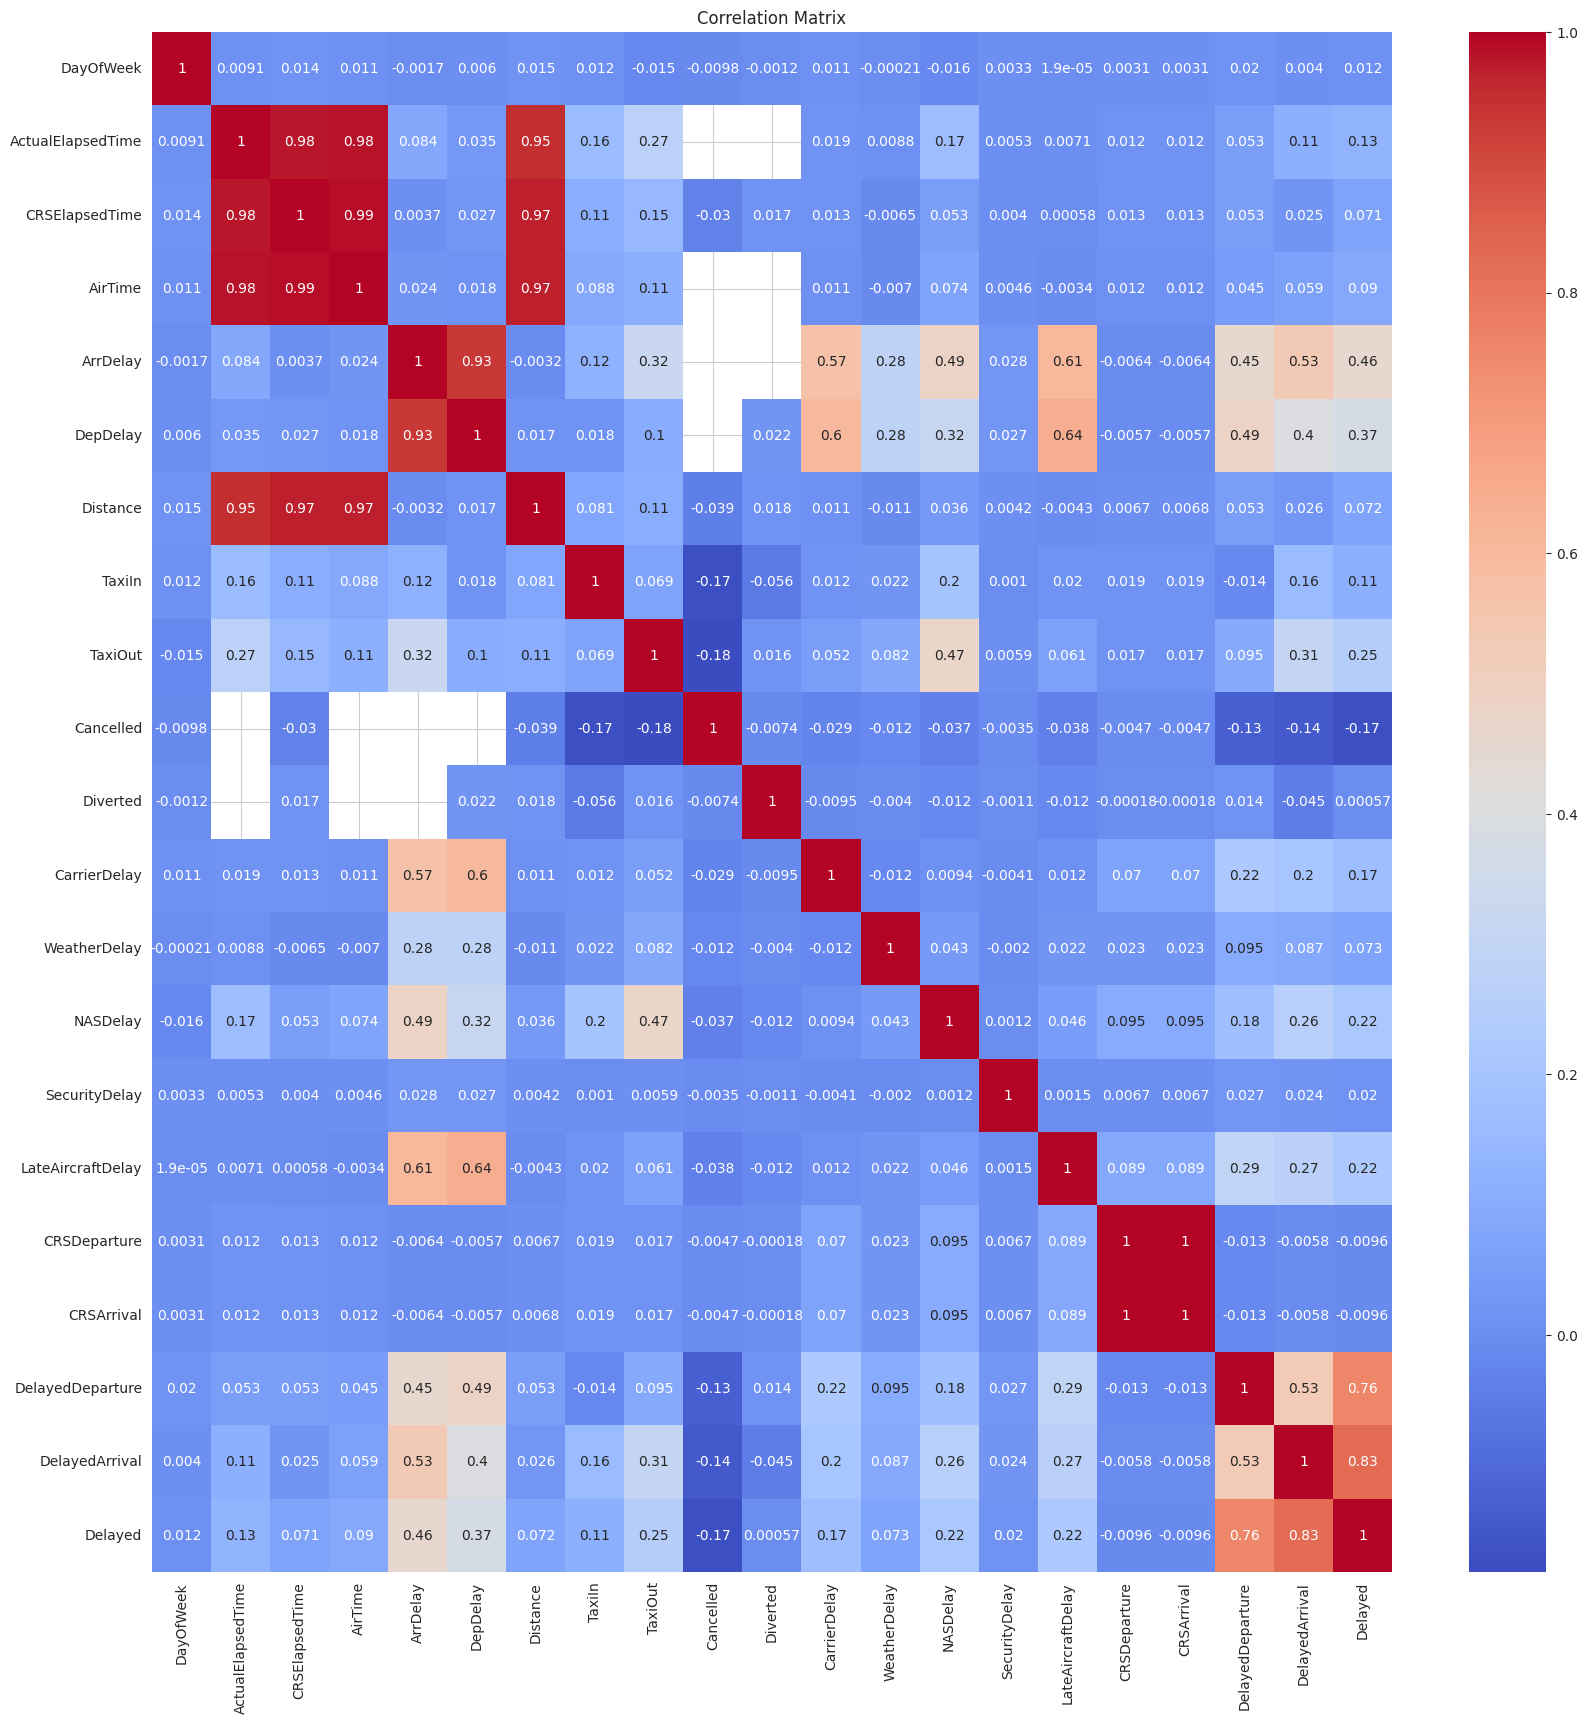

In [9]:
corrMatrix = flights[flights.columns[flights.dtypes != "category"]] \
                .drop(columns=["FlightNum", "Arrival", "Departure"]) \
                .corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("../plots/correlation_matrix.png")
plt.show()

# Exploring how different factors relate to delays

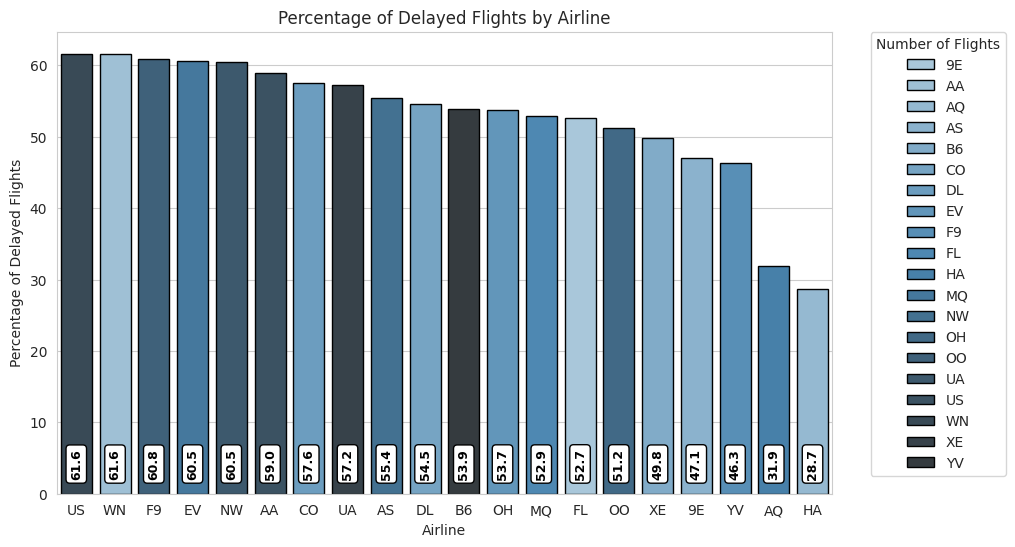

In [10]:

delay_by_carrier = flights.groupby("UniqueCarrier")["Delayed"].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
#add hue for the number of flights per carrier
sns.barplot(x=delay_by_carrier.index, y=delay_by_carrier.values, order=delay_by_carrier.index, palette="Blues_d",
             edgecolor = "black", 
             hue = flights.groupby("UniqueCarrier")["FlightNum"].count().sort_values(ascending=False).index,
             dodge = False)
plt.xlabel("Airline")
plt.ylabel("Percentage of Delayed Flights")
plt.title("Percentage of Delayed Flights by Airline")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Number of Flights")
for i, v in enumerate(delay_by_carrier):
    plt.text(i, 2, str(round(v, 1)), ha="center", fontsize=9, rotation=90,
             va="bottom", color="black", fontweight="bold", 
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.savefig("../plots/delay_by_carrier.png")
plt.show()


In [11]:
#Interactive plot
fig = px.bar(delay_by_carrier, x=delay_by_carrier.index, y=delay_by_carrier.values, title="Percentage of delayed flights by airline")
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor="LightSteelBlue",
)
fig.update_xaxes(title_text="Airline")
fig.update_yaxes(title_text="Percentage of delayed flights")
fig.write_html("../plots/delay_by_carrier_interactive.html")
fig.show()

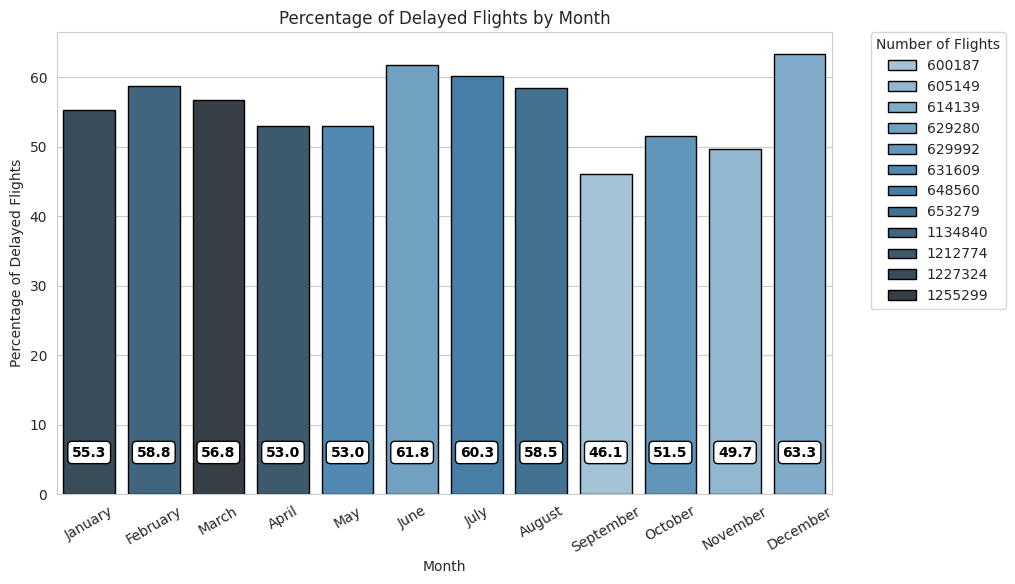

In [12]:
delay_by_month = flights.groupby(flights["Departure"].dt.month)["Delayed"] \
            .agg(["mean", "count"])\
            .rename_axis("month")

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(10, 6))
sns.barplot(x=delay_by_month.index, y=delay_by_month["mean"] * 100, order=delay_by_month.index, hue=delay_by_month["count"],
             palette="Blues_d", dodge=False, edgecolor="black")
plt.xlabel("Month")
plt.ylabel("Percentage of Delayed Flights")
plt.title("Percentage of Delayed Flights by Month")
plt.xticks(range(12), months)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Number of Flights")
for i, v in enumerate(delay_by_month["mean"] * 100):
    plt.text(i, 5, str(round(v, 1)), ha="center", fontsize=10,
             va="bottom", color="black", fontweight="bold", 
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.savefig("../plots/delay_by_month.png")
plt.show()

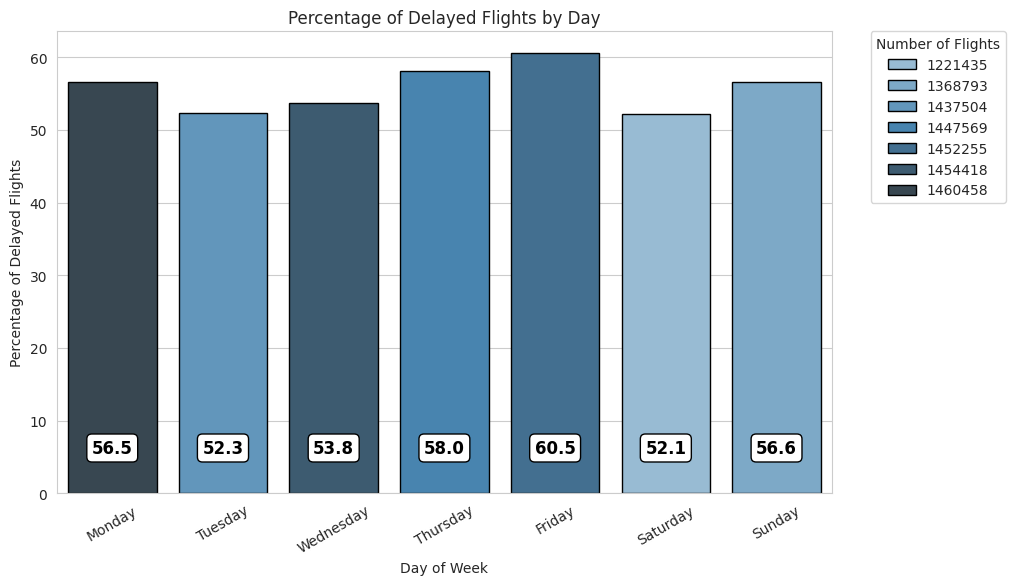

In [13]:
delay_by_day = flights.groupby("DayOfWeek")["Delayed"] \
            .agg(["mean", "count"])\
            .rename_axis("day")

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10, 6))
sns.barplot(x=delay_by_day.index, y=delay_by_day["mean"] * 100, order=delay_by_day.index, 
            hue=delay_by_day["count"], palette="Blues_d", dodge=False, edgecolor="black")
plt.xlabel("Day of Week")
plt.ylabel("Percentage of Delayed Flights")
plt.title("Percentage of Delayed Flights by Day")
plt.xticks(range(7), days)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Number of Flights")
for i, v in enumerate(delay_by_day["mean"] * 100):
    plt.text(i, 5, str(round(v, 1)), ha="center", fontsize=12,
             va="bottom", color="black", fontweight="bold", 
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.savefig("../plots/delay_by_day.png")
plt.show()

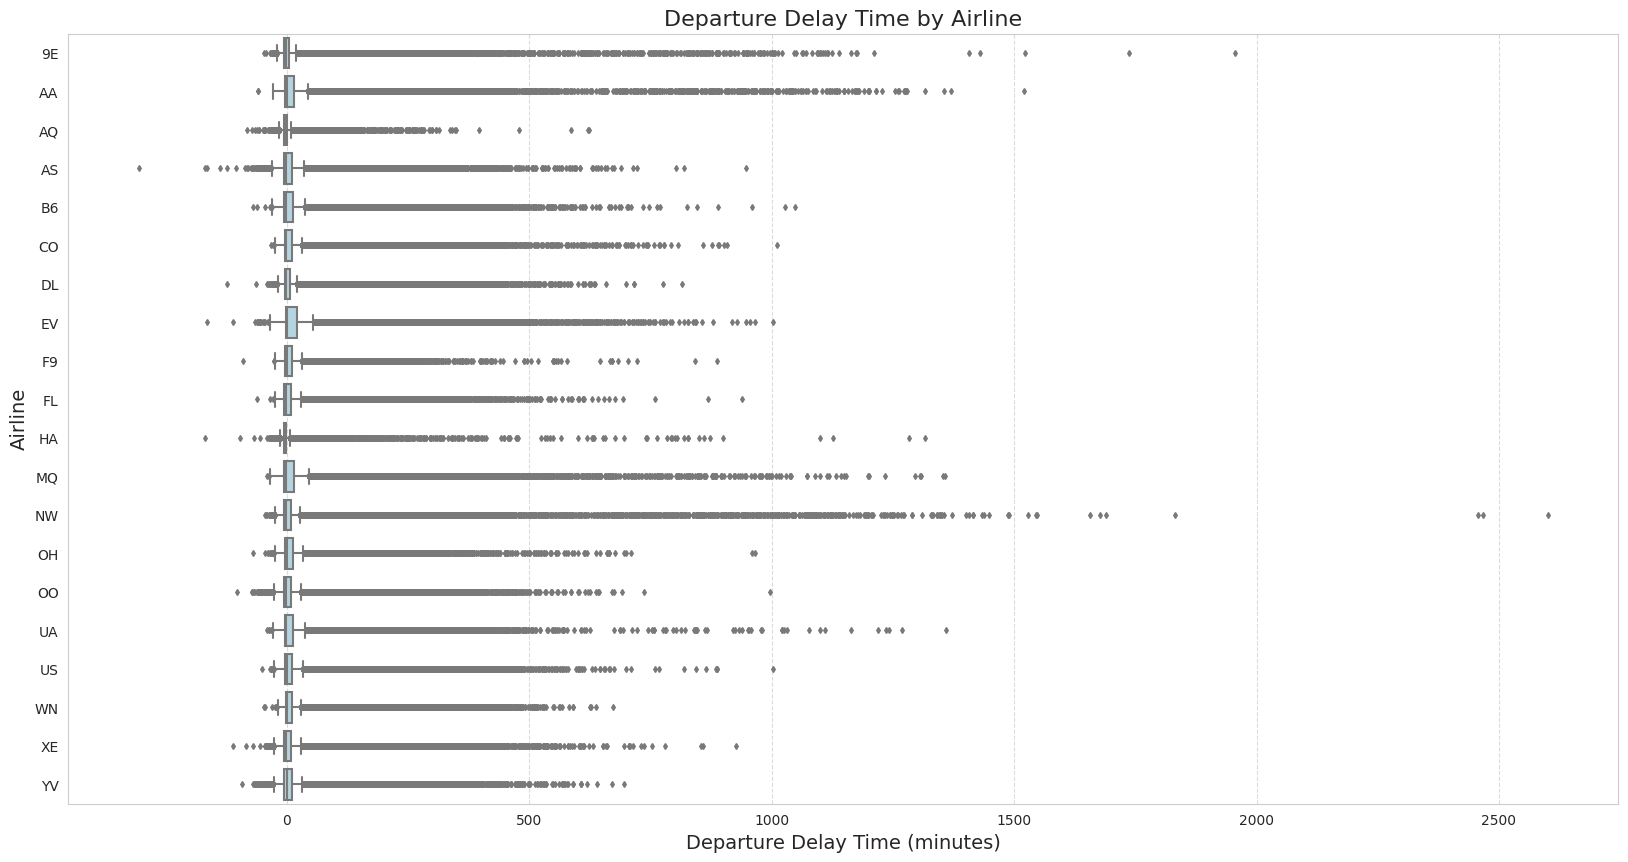

In [14]:
plt.figure(figsize=(20, 10))
sns.boxplot(y="UniqueCarrier", x="DepDelay", data=flights, color = "lightblue", orient="h", fliersize=3)
plt.xlabel("Departure Delay Time (minutes)", fontsize=14)
plt.ylabel("Airline", fontsize=14)
plt.title("Departure Delay Time by Airline", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("../plots/delay_by_carrier_distribution.png")
plt.show()

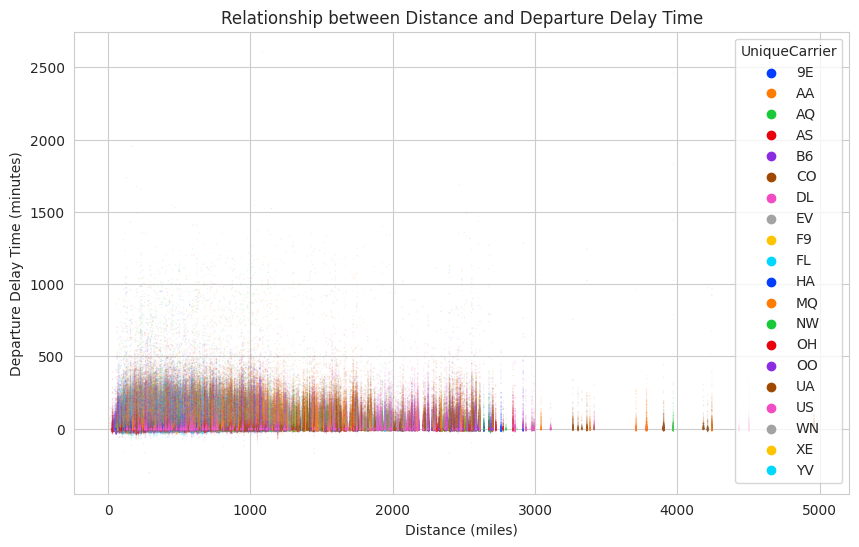

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Distance", y="DepDelay", data=flights, hue="UniqueCarrier", palette="bright",
                alpha=0.1, s=1)
plt.xlabel("Distance (miles)")
plt.ylabel("Departure Delay Time (minutes)")
plt.title("Relationship between Distance and Departure Delay Time")
plt.savefig("../plots/distance_vs_departure_delay.png")
plt.show()

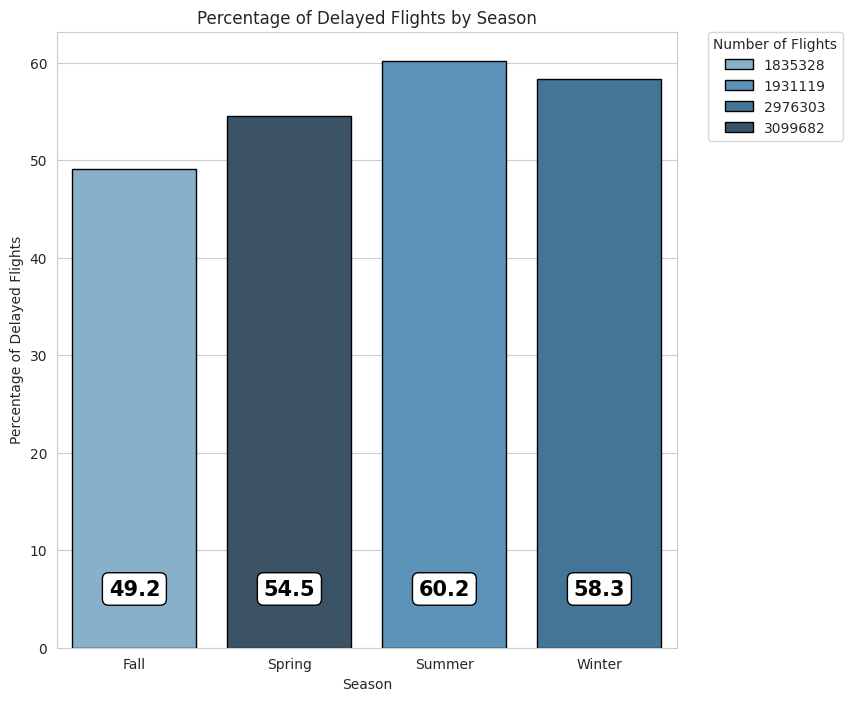

In [16]:
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}

flights['Season'] = flights['Departure'].dt.month.map(seasons)

delayed = flights[flights['Delayed'] > 0] 
delay_by_season = delayed.groupby('Season')['FlightNum'].count() # Count the number of delayed flights by season
total_by_season = flights.groupby('Season')['FlightNum'].count() # Count the total number of flights by season
delay_by_seson_percent = delay_by_season / total_by_season * 100  # Calculate the percentage of delayed flights by season

plt.figure(figsize=(8,8))
sns.barplot(x=delay_by_seson_percent.index, y=delay_by_seson_percent.values,
             hue=total_by_season.values, palette="Blues_d", dodge=False, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Number of Flights")
plt.title('Percentage of Delayed Flights by Season')
plt.xlabel('Season')
plt.ylabel('Percentage of Delayed Flights')
for i, v in enumerate(delay_by_seson_percent.values):
    plt.text(i, 5, str(round(v, 1)), ha="center", fontsize=15,
             va="bottom", color="black", fontweight="bold", 
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.savefig("../plots/delay_by_season.png")
plt.show()


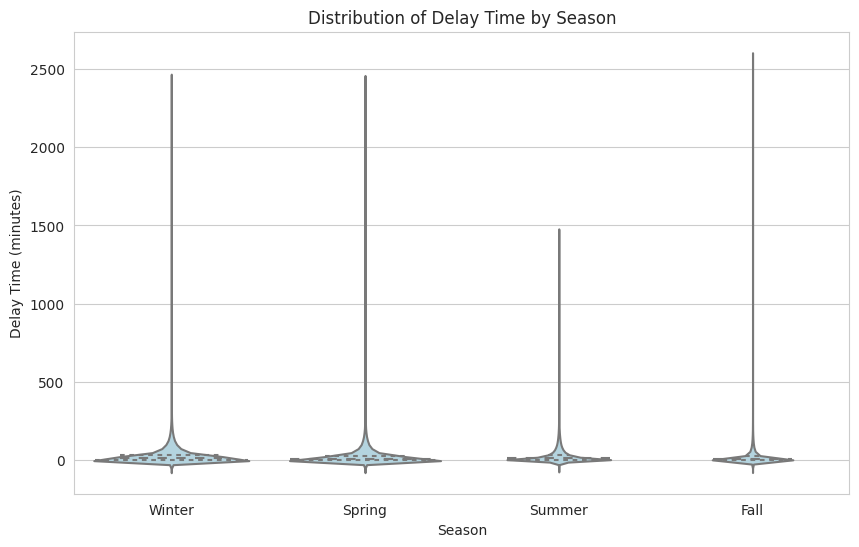

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Season', y='ArrDelay', data=delayed,
                color="lightblue", scale="count", inner="quartile")
plt.title('Distribution of Delay Time by Season')
plt.xlabel('Season') 
plt.ylabel('Delay Time (minutes)') 
sns.set_palette("pastel") 
plt.savefig("../plots/delay_by_season_distribution.png")
plt.show()


# Comparing routes

#### What is the average delay for each route?

In [18]:
grouped_by_routes = flights.groupby(["Origin", "Dest"])

# Calculate the average departure and arrival delays for each route
avg_delays = grouped_by_routes[["DepDelay", "ArrDelay"]].mean().reset_index()

avg_delays.head()


,Origin,Dest,DepDelay,ArrDelay
0,ABE,ABE,NaN,NaN
1,ABE,ABI,NaN,NaN
2,ABE,ABQ,NaN,NaN
3,ABE,ABY,NaN,NaN
4,ABE,ACK,NaN,NaN


In [19]:
# Find the top 10 routes with...
def get_top_routes(col, n, least=True):
    return avg_delays.sort_values(col, ascending=least)[["Origin", "Dest", col]].head(n).set_index(i for i in range(1, n + 1)).rename_axis("Rank", axis=1)


In [20]:
# The highest average departure delays
get_top_routes("DepDelay", 10, least=False)

Rank,Origin,Dest,DepDelay
1,ONT,IAD,386.0
2,ABQ,GJT,366.0
3,SDF,SPI,329.0
4,ELP,MFE,307.0
5,HPN,PIA,298.0
6,OKC,GJT,270.0
7,ACY,MYR,222.0
8,AUS,RFD,211.0
9,ACV,SJC,211.0
10,ORD,ONT,209.0


In [21]:
# The highest average arrival delays
get_top_routes("ArrDelay", 10, least=False)


Rank,Origin,Dest,ArrDelay
1,ONT,IAD,370.0
2,ELP,MFE,316.0
3,ACY,MYR,252.0
4,JAX,CMH,217.0
5,ATW,DSM,210.0
6,DCA,PLN,210.0
7,AVP,BUF,195.0
8,JFK,GSO,181.0
9,ORF,BOI,180.0
10,GSP,RSW,175.0


In [22]:
# Tthe lowest average departure delays
get_top_routes("DepDelay", 10)


Rank,Origin,Dest,DepDelay
1,SDF,JAX,-85.0
2,OMA,LNK,-34.0
3,FSD,SDF,-25.0
4,ATW,CHS,-23.0
5,BNA,FSD,-23.0
6,HPN,PIT,-22.0
7,RDM,SMF,-22.0
8,BDL,BOS,-20.0
9,BOS,BTV,-18.0
10,COS,TUL,-16.0


In [23]:
# Find the top 10 routes with the highest sum of average departure and arrival delays
avg_delays["TotalDelay"] = avg_delays["DepDelay"] + avg_delays["ArrDelay"]
get_top_routes("TotalDelay", 10, least=False)


Rank,Origin,Dest,TotalDelay
1,ONT,IAD,756.0
2,ELP,MFE,623.0
3,ACY,MYR,474.0
4,AVP,BUF,396.0
5,ATW,DSM,395.0
6,JAX,CMH,382.0
7,DCA,PLN,378.0
8,JFK,GSO,354.0
9,ORF,BOI,340.0
10,FAT,BOI,306.0


### Routes with the highest and lowest average departure delays

In [24]:
coords = airports[["iata", "lat", "lon"]]
coords.columns = ["Origin", "Latitude", "Longitude"]

merged = pd.merge(avg_delays, coords, on="Origin")
merged.head()

,Origin,Dest,DepDelay,ArrDelay,TotalDelay,Latitude,Longitude
0,ABE,ABE,NaN,NaN,NaN,40.6521,-75.440804
1,ABE,ABI,NaN,NaN,NaN,40.6521,-75.440804
2,ABE,ABQ,NaN,NaN,NaN,40.6521,-75.440804
3,ABE,ABY,NaN,NaN,NaN,40.6521,-75.440804
4,ABE,ACK,NaN,NaN,NaN,40.6521,-75.440804


The plot below shows the routes with the highest and lowest average departure delays. The routes are colored according to the average departure delay of the flights in that route. Green means the flights departed earlier than scheduled, delayed flights are in shades of red, according to the delay. You can also click on any route to see the origin and destination airports and the exact average departure delay in minutes.

In [ ]:
outliers = merged[(merged["DepDelay"] > merged["DepDelay"].quantile(0.995)) | (merged["DepDelay"] < merged["DepDelay"].quantile(0.005))]

m = folium.Map()

# Create a color scale object using branca
color_scale = branca.colormap.linear.RdYlGn_11.scale(0, outliers["DepDelay"].max())

def color(delay):
    if delay <= 0:
        return "green"
    return color_scale(-delay + 50)

# Make the map dark
folium.TileLayer('cartodbdark_matter',name="Routes with the highest and lowest average departure delays", control=False).add_to(m)

# Loop through the merged dataframe and add lines to the map
for i, row in outliers.iterrows():
    # Get the origin and destination coordinates
    origin = [row["Latitude"], row["Longitude"]]
    dest = coords[coords["Origin"] == row["Dest"]][["Latitude", "Longitude"]].values[0]
    # Get the departure delay
    delay = row["DepDelay"]
    folium.CircleMarker(origin, radius=3, color="blue").add_to(m)
    folium.Marker(origin, popup=row["Origin"]).add_to(m)
    # Add a line to the map with the corresponding color and popup
    folium.PolyLine([origin, dest], color=color(delay), popup=f"{row['Origin']} - {row['Dest']}: {delay:.2f} min").add_to(m)

# Add the color scale to the map
color_scale.caption = "Average departure delay (min)"
m.add_child(color_scale)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Change the zoom
m.fit_bounds(m.get_bounds())

m.save("../plots/routes_outlying_average_routes_map.html")
m

### Routes with the most and least often delayed departures

In [27]:
delay_count = pd.DataFrame(flights[flights["Delayed"] == True].value_counts(["Origin", "Dest"])).reset_index()
merged = pd.merge(delay_count, merged, on=["Origin", "Dest"])
merged

,Origin,Dest,count,DepDelay,ArrDelay,TotalDelay,Latitude,Longitude
0,LAX,LAS,10604,8.231945,8.263103,16.495049,33.942501,-118.407997
1,LAS,LAX,10549,9.746355,8.797824,18.544178,36.080101,-115.152000
2,PHX,LAS,9833,10.174170,8.603924,18.778095,33.434299,-112.012001
3,ORD,LGA,9440,23.849619,25.547798,49.397415,41.978600,-87.904800
4,ATL,LGA,9439,17.227598,18.287838,35.515434,33.636700,-84.428101
...,...,...,...,...,...,...,...,...
5405,CRW,RDU,1,100.000000,95.000000,195.000000,38.373100,-81.593201
5406,CRW,LEX,1,4.000000,8.000000,12.000000,38.373100,-81.593201
5407,CRW,BNA,1,5.000000,17.000000,22.000000,38.373100,-81.593201
5408,OMA,COS,1,68.000000,NaN,NaN,41.303200,-95.894096


The plot below shows the routes with the highest count of delayed flights. You can also click on any route to see exact number of delayed flights.

In [ ]:
outliers = merged[merged["count"] > merged["count"].quantile(0.99)]

m = folium.Map()

# Create a color scale object using branca
color_scale = branca.colormap.linear.viridis.scale(outliers["count"].min(), outliers["count"].max())
#set other branca colormap


#make the map dark
folium.TileLayer('cartodbdark_matter', name="Dark Map", control=False).add_to(m)


for i, row in outliers.iterrows():
    # Get the origin and destination coordinates
    origin = [row["Latitude"], row["Longitude"]]
    dest = coords[coords["Origin"] == row["Dest"]][["Latitude", "Longitude"]].values[0]
    # Get the number of departure delays
    count = row["count"]
    folium.CircleMarker(origin, radius=3, color="blue").add_to(m)
    folium.Marker(origin, popup=row["Origin"]).add_to(m)
    # Add a line to the map with the corresponding color and popup
    folium.PolyLine([origin, dest], color=color_scale(count), popup=f"{row['Origin']} - {row['Dest']}: {count:.2f} times").add_to(m)

color_scale.caption = "Average departure delay (min)"
m.add_child(color_scale)
folium.LayerControl().add_to(m)
m.fit_bounds(m.get_bounds())

m.save("../plots/routes_most_often_delayed_map.html")
m